In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [22]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [11]:
url = "https://news.google.com/search?q=%24TSLA&hl=en-US&gl=US&ceid=US%3Aen"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
posts = soup.find_all("div", class_= "xrnccd")

In [13]:
len(posts)

100

In [18]:
posts[0].find("h3").text

'Tesla (TSLA) Rose on Investors’ Expectations'

In [19]:
posts[1].find("h3").text

'TSLA Stock Price Predictions: Where Will Tesla Be in 5 Years?'

In [20]:
article_headlines = []

for i in range(0, len(posts)):
    article_headlines.append(posts[i].find("h3").text)

article_headlines[:5]

['Tesla (TSLA) Rose on Investors’ Expectations',
 'TSLA Stock Price Predictions: Where Will Tesla Be in 5 Years?',
 'Unusual Put Option Trade in Tesla (TSLA) Worth $191983.01K',
 'Canada Pension Plan slashes stake in Tesla (TSLA) and other EV ...',
 'GM vs. TSLA: Which Stock Is the Better Value Option?']

In [24]:
analyzer = SentimentIntensityAnalyzer()


In [25]:
sentence = article_headlines[0]

sentiment_scores = analyzer.polarity_scores(sentence)


In [26]:
sentiment_score = sentiment_scores['compound']

print("Sentiment Score:", sentiment_score)

Sentiment Score: 0.0


In [27]:
average_score = 0

for article in article_headlines:
    sentiment_scores = analyzer.polarity_scores(article)
    average_score += sentiment_scores['compound']

average_score = average_score / len(article_headlines)


In [28]:
print(average_score)

0.08902899999999998


In [65]:

def get_sentiment_score(company):
    url = "https://news.google.com/search?q=%24{}&hl=en-US&gl=US&ceid=US%3Aen".format(company)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    posts = soup.find_all("div", class_= "xrnccd")

    article_headlines = []

    for i in range(0, len(posts)):
        article_headlines.append(posts[i].find("h3").text)

    analyzer = SentimentIntensityAnalyzer()

    average_score = 0

    for article in article_headlines:
        sentiment_scores = analyzer.polarity_scores(article)
        average_score += sentiment_scores['compound']

    try:
        average_score = average_score / len(article_headlines)
    
    except ZeroDivisionError:
        average_score = 0

    print("{} Sentiment Score is: {:.2f}".format(company, average_score))



In [42]:
get_sentiment_score("TSLA")

TSLA Sentiment Score is: 0.10


In [43]:
get_sentiment_score("AAPL")

AAPL Sentiment Score is: 0.08


In [44]:
get_sentiment_score("NFLX")

NFLX Sentiment Score is: 0.15


In [66]:
get_sentiment_score("NLSN")

NLSN Sentiment Score is: 0.00


In [58]:
#obtained list of stocks currently in the S&P 500: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

sp500_tickers = [
    "MMM", "ABT", "ABBV", "ABMD", "ACN", "ATVI", "ADBE", "AMD", "AAP", "AES",
    "AFL", "A", "APD", "AKAM", "ALK", "ALB", "ARE", "ALXN", "ALGN", "ALLE",
    "LNT", "ALL", "GOOGL", "GOOG", "MO", "AMZN", "AMCR", "AEE", "AAL", "AEP",
    "AXP", "AIG", "AMT", "AWK", "AMP", "ABC", "AME", "AMGN", "APH", "ADI",
    "ANSS", "ANTM", "AON", "AOS", "APA", "AAPL", "AMAT", "APTV", "ADM", "ANET",
    "AJG", "AIZ", "ATO", "T", "ADSK", "ADP", "AZO", "AVB", "AVY", "BKR", "BLL",
    "BAC", "BK", "BAX", "BDX", "BRK.B", "BBY", "BIO", "BIIB", "BLK", "BA", "BKNG",
    "BWA", "BXP", "BSX", "BMY", "AVGO", "BR", "BF.B", "CHRW", "COG", "CDNS",
    "CPB", "COF", "CAH", "KMX", "CCL", "CARR", "CTLT", "CAT", "CBOE", "CBRE",
    "CDW", "CE", "CNC", "CNP", "CERN", "CF", "SCHW", "CHTR", "CVX", "CMG", "CB",
    "CHD", "CI", "CINF", "CTAS", "CSCO", "C", "CFG", "CTXS", "CLX", "CME", "CMS",
    "KO", "CTSH", "CL", "CMCSA", "CMA", "CAG", "CXO", "COP", "ED", "STZ", "COO",
    "CPRT", "GLW", "CTVA", "COST", "CCI", "CSX", "CMI", "CVS", "DHI", "DHR",
    "DRI", "DVA", "DE", "DAL", "XRAY", "DVN", "DXCM", "FANG", "DLR", "DFS",
    "DISCA", "DISCK", "DISH", "DG", "DLTR", "D", "DPZ", "DOV", "DOW", "DTE",
    "DUK", "DRE", "DD", "DXC", "EMN", "ETN", "EBAY", "ECL", "EIX", "EW", "EA",
    "EMR", "ENPH", "ETR", "EOG", "EFX", "EQIX", "EQR", "ESS", "EL", "ETSY",
    "RE", "EVRG", "ES", "EXC", "EXPE", "EXPD", "EXR", "XOM", "FFIV", "FB",
    "FAST", "FRT", "FDX", "FIS", "FITB", "FE", "FRC", "FISV", "FLT", "FLIR",
    "FLS", "FMC", "F", "FTNT", "FTV", "FBHS", "FOXA", "FOX", "BEN", "FCX",
    "GPS", "GRMN", "IT", "GNRC", "GD", "GE", "GIS", "GM", "GPC", "GILD", "GL",
    "GPN", "GS", "GWW", "HAL", "HBI", "HIG", "HAS", "HCA", "PEAK", "HSIC", "HSY",
    "HES", "HPE", "HLT", "HFC", "HOLX", "HD", "HON", "HRL", "HST", "HWM", "HPQ",
    "HUM", "HBAN", "HII", "IEX", "IDXX", "INFO", "ITW", "ILMN", "INCY", "IR",
    "INTC", "ICE", "IBM", "IP", "IPG", "IFF", "INTU", "ISRG", "IVZ", "IPGP",
    "IQV", "IRM", "JKHY", "J", "JBHT", "SJM", "JNJ", "JCI", "JPM", "JNPR", "KSU",
    "K", "KEY", "KEYS", "KMB", "KIM", "KMI", "KLAC", "KHC", "KR", "LB", "LHX",
    "LH", "LRCX", "LW", "LVS", "LEG", "LDOS", "LEN", "LLY", "LNC", "LIN", "LYV",
    "LKQ", "LMT", "L", "LOW", "LUMN", "LYB", "MTB", "MRO", "MPC", "MKTX", "MAR",
    "MMC", "MLM", "MAS", "MA", "MKC", "MXIM", "MCD", "MCK", "MDT", "MRK", "MET",
    "MTD", "MGM", "MCHP", "MU", "MSFT", "MAA", "MHK", "TAP", "MDLZ", "MPWR",
    "MNST", "MCO", "MS", "MOS", "MSI", "MSCI", "NDAQ", "NTAP", "NFLX", "NWL",
    "NEM", "NWSA", "NWS", "NEE", "NLSN", "NKE", "NI", "NSC", "NTRS", "NOC",
    "NLOK", "NCLH", "NOV", "NRG", "NUE", "NVDA", "NVR", "ORLY", "OXY", "ODFL",
    "OMC", "OKE", "ORCL", "OTIS", "PCAR", "PKG", "PH", "PAYX", "PAYC", "PYPL",
    "PNR", "PBCT", "PEP", "PKI", "PRGO", "PFE", "PM", "PSX", "PNW", "PXD", "PNC",
    "POOL", "PPG", "PPL", "PFG", "PG", "PGR", "PLD", "PRU", "PEG", "PSA", "PHM",
    "PVH", "QRVO", "PWR", "QCOM", "DGX", "RL", "RJF", "RTX", "O", "REG", "REGN",
    "RF", "RSG", "RMD", "RHI", "ROK", "ROL", "ROP", "ROST", "RCL", "SPGI",
    "CRM", "SBAC", "SLB", "STX", "SEE", "SRE", "NOW", "SHW", "SPG", "SWKS", "SLG",
    "SNA", "SO", "LUV", "SWK", "SBUX", "STT", "STE", "SYK", "SIVB", "SYF", "SNPS",
    "SYY", "TMUS", "TROW", "TTWO", "TPR", "TGT", "TEL", "TDY", "TFX", "TER",
    "TSLA", "TXN", "TXT", "TMO", "TIF", "TJX", "TSCO", "TT", "TDG", "TRV", "TRMB",
    "TFC", "TWTR", "TYL", "TSN", "UDR", "ULTA", "USB", "UAA", "UA", "UNP", "UAL",
    "UNH", "UPS", "URI", "UHS", "UNM", "VLO", "VAR", "VTR", "VRSN", "VRSK", "VZ",
    "VRTX", "VFC", "VIAC", "VTRS", "V", "VNT", "VNO", "VMC", "WRB", "WAB", "WMT",
    "WBA", "DIS", "WM", "WAT", "WEC", "WFC", "WELL", "WST", "WDC", "WU", "WRK",
    "WY", "WHR", "WMB", "WLTW", "WYNN", "XEL", "XRX", "XLNX", "XYL", "YUM",
    "ZBRA", "ZBH", "ZION", "ZTS"
]




In [72]:
#changing function so it doesn't print the sentiment score, but instead returns it and also adding except statement to handle ZeroDivisionError


def get_sentiment_score(company):
    url = "https://news.google.com/search?q=%24{}&hl=en-US&gl=US&ceid=US%3Aen".format(company)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    posts = soup.find_all("div", class_= "xrnccd")

    article_headlines = []

    for i in range(0, len(posts)):
        article_headlines.append(posts[i].find("h3").text)

    analyzer = SentimentIntensityAnalyzer()

    average_score = 0

    for article in article_headlines:
        sentiment_scores = analyzer.polarity_scores(article)
        average_score += sentiment_scores['compound']

    try:
        average_score = average_score / len(article_headlines)
    
    except ZeroDivisionError:
        average_score = 0

    return average_score



In [74]:
from tqdm import tqdm

In [75]:
# stock_scores = []

# for stock in range(0, len(sp500_tickers)):
#     stock_scores.append(get_sentiment_score(sp500_tickers[stock]))


In [76]:
#putting tdqm wrapper around fucntion to get progress bar

stock_scores = []

# Create a tqdm progress bar with the total number of tickers
with tqdm(total=len(sp500_tickers)) as pbar:
    for stock in sp500_tickers:
        stock_scores.append(get_sentiment_score(stock))
        pbar.update(1) 

100%|██████████| 508/508 [12:16<00:00,  1.45s/it]


In [77]:
#create pandas dataframe with stock tickers and sentiment scores
df = pd.DataFrame(list(zip(sp500_tickers, stock_scores)), columns =['Ticker', 'Sentiment Score'])

In [78]:
df.head()

,Ticker,Sentiment Score
0,MMM,0.081710
1,ABT,0.126945
2,ABBV,0.099671
3,ABMD,0.089133
4,ACN,0.121067


In [82]:
#find max and min sentiment scores
df.loc[df['Sentiment Score'] == df['Sentiment Score'].max()]


,Ticker,Sentiment Score
66,BBY,0.598765


In [83]:
df.loc[df['Sentiment Score'] == df['Sentiment Score'].min()]


,Ticker,Sentiment Score
304,MLM,-0.574395


In [87]:
df.head()

,Ticker,Sentiment Score
0,MMM,0.081710
1,ABT,0.126945
2,ABBV,0.099671
3,ABMD,0.089133
4,ACN,0.121067


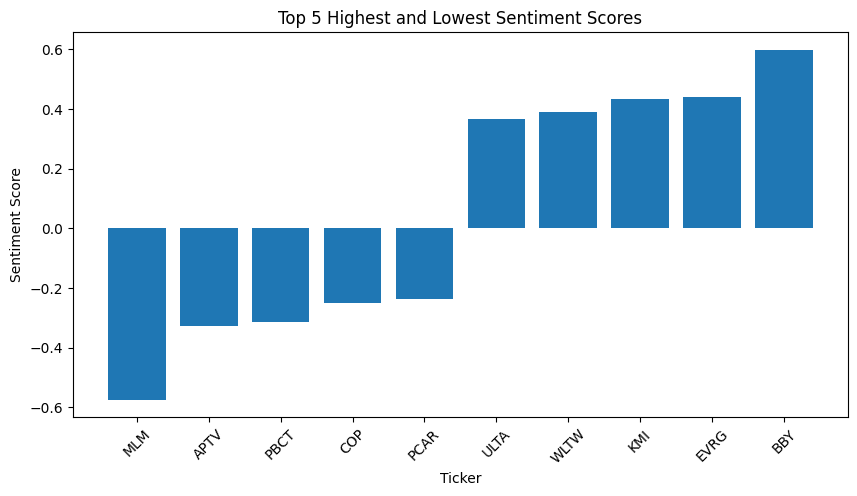

In [91]:
#create visual to show top 5 highest and lowest sentiment scores: 

df_sorted = df.sort_values("Sentiment Score")

top_5_highest = df_sorted.tail(5)
top_5_lowest = df_sorted.head(5)

plot_data = pd.concat([top_5_lowest, top_5_highest])

plt.figure(figsize=(10, 5))
plt.bar(plot_data["Ticker"], plot_data["Sentiment Score"])

plt.xlabel("Ticker")
plt.ylabel("Sentiment Score")
plt.title("Top 5 Highest and Lowest Sentiment Scores")

plt.xticks(rotation=45)
plt.show()
